In [28]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen 

In [29]:
url = "https://raw.githubusercontent.com/Clement87/Pepito-data/refs/heads/main/tweets.json";
response = urlopen(url)
jsondata = json.load(response)
df = pd.DataFrame(jsondata)

In [30]:
df.head()

,full_text,created_at,media
0,Pépito is back home (02:14:56) https://t.co/9f...,Sat Nov 23 01:15:00 +0000 2024,https://pbs.twimg.com/media/GdCCRwrXEAAgu0u.jpg
1,Pépito is back home (21:52:30) https://t.co/mM...,Fri Nov 22 20:52:33 +0000 2024,https://pbs.twimg.com/media/GdBGNcmXMAAtlYv.jpg
2,Pépito is out (21:04:26) https://t.co/Zey7MlVqj4,Fri Nov 22 20:04:29 +0000 2024,https://pbs.twimg.com/media/GdA7NMHWQAAFmzC.jpg
3,Pépito is back home (18:00:56) https://t.co/o9...,Fri Nov 22 17:01:00 +0000 2024,https://pbs.twimg.com/media/GdARNgeXcAARxqK.jpg
4,Pépito is back home (07:09:34) https://t.co/bG...,Fri Nov 22 06:09:37 +0000 2024,https://pbs.twimg.com/media/Gc98H2NWUAEzlH4.jpg


In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], utc=True).dt.tz_convert('Europe/Madrid')
df.head()

/tmp/ipykernel_44242/795197278.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], utc=True).dt.tz_convert('Europe/Madrid')


,full_text,created_at,media
0,Pépito is back home (02:14:56) https://t.co/9f...,2024-11-23 02:15:00+01:00,https://pbs.twimg.com/media/GdCCRwrXEAAgu0u.jpg
1,Pépito is back home (21:52:30) https://t.co/mM...,2024-11-22 21:52:33+01:00,https://pbs.twimg.com/media/GdBGNcmXMAAtlYv.jpg
2,Pépito is out (21:04:26) https://t.co/Zey7MlVqj4,2024-11-22 21:04:29+01:00,https://pbs.twimg.com/media/GdA7NMHWQAAFmzC.jpg
3,Pépito is back home (18:00:56) https://t.co/o9...,2024-11-22 18:01:00+01:00,https://pbs.twimg.com/media/GdARNgeXcAARxqK.jpg
4,Pépito is back home (07:09:34) https://t.co/bG...,2024-11-22 07:09:37+01:00,https://pbs.twimg.com/media/Gc98H2NWUAEzlH4.jpg


Check if there is some invalid data

In [32]:
back = "Pépito is back home"
out = "Pépito is out"
df["isBack"] = df["full_text"].str.contains(back)
df["isOut"] = df["full_text"].str.contains(out)
df['out_or_back'] = np.where(df['isOut'], 'out', np.where(df['isBack'], 'back', 'other'))
df.drop(columns=['full_text', 'media', 'isBack', 'isOut'], inplace=True)
df.isna().sum()


created_at     0
out_or_back    0
dtype: int64

In [33]:
df['time'] = df['created_at'].dt.time
df['date'] = df['created_at'].dt.date
df.sort_values(by='created_at', inplace=True)
df.head()

,created_at,out_or_back,time,date
3627,2013-01-09 23:14:06+01:00,out,23:14:06,2013-01-09
3626,2013-01-10 00:13:05+01:00,back,00:13:05,2013-01-10
3625,2013-01-10 04:47:24+01:00,out,04:47:24,2013-01-10
3624,2013-01-10 05:39:11+01:00,back,05:39:11,2013-01-10
3623,2013-01-10 20:18:31+01:00,back,20:18:31,2013-01-10


<Axes: xlabel='out_or_back'>

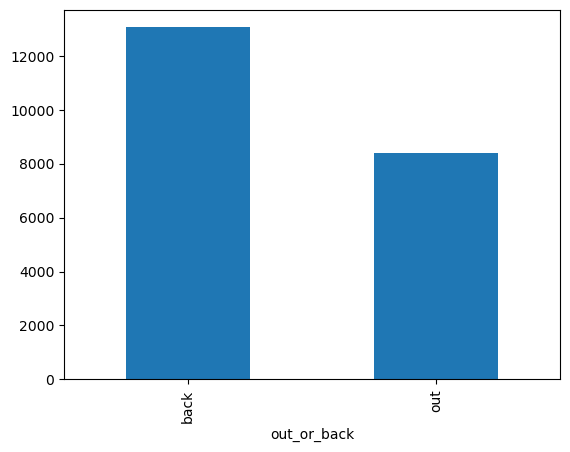

In [34]:
#histogram of out and back
df['out_or_back'].value_counts().plot(kind='bar')

In [35]:
date_df = df.groupby('date')['out_or_back'].value_counts().unstack().fillna(0).reset_index()
date_df.head()

out_or_back,date,back,out
0,2013-01-09,0.0,1.0
1,2013-01-10,4.0,3.0
2,2013-01-11,5.0,5.0
3,2013-01-12,5.0,5.0
4,2013-01-13,3.0,2.0


In [36]:
out_mean = date_df['out'].mean()
back_mean = date_df['back'].mean()
print(f"Mean out: {out_mean}")
print(f"Mean back: {back_mean}")

Mean out: 1.981805293005671
Mean back: 3.0857750472589793


In [37]:
df["hour"] = df["created_at"].dt.hour
hour_df = df.groupby('hour')['out_or_back'].value_counts().unstack().fillna(0).reset_index()
hour_df.head()

out_or_back,hour,back,out
0,0,933,497
1,1,840,449
2,2,653,495
3,3,691,631
4,4,847,914


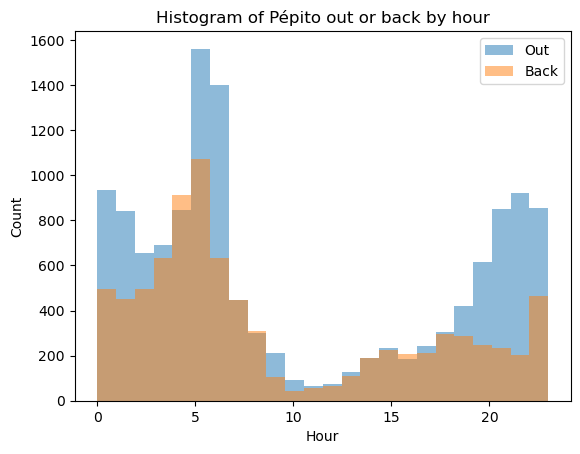

In [38]:
plt.hist(df[df['out_or_back'] == 'back']['hour'], bins=24, alpha=0.5)
plt.hist(df[df['out_or_back'] == 'out']['hour'], bins=24, alpha=0.5)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Histogram of Pépito out or back by hour')
plt.legend(['Out', 'Back'])
plt.show() 

In [39]:
df["month"] = df["created_at"].dt.month
month_df = df.groupby('hour')['out_or_back'].value_counts().unstack().fillna(0).reset_index()
month_df.head()

out_or_back,hour,back,out
0,0,933,497
1,1,840,449
2,2,653,495
3,3,691,631
4,4,847,914


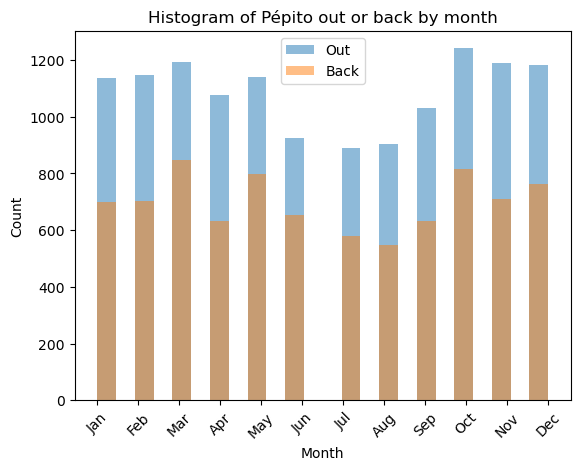

In [40]:
plt.hist(df[df['out_or_back'] == 'back']['month'], bins=24, alpha=0.5)
plt.hist(df[df['out_or_back'] == 'out']['month'], bins=24, alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Histogram of Pépito out or back by month')
plt.legend(['Out', 'Back'])
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show() 